<a href="https://colab.research.google.com/github/macorony/Machine_Learning_Basics/blob/main/Supervised_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The concepts of supervised learning discussed in the <<Introduction to Machine Learning with Python>>

Basic concepts of supervised learning discussed in the <b>Introduction to Machine Learning with Python<b> (https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/)

In [2]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 15.0 MB/s eta 0:00:00


In [3]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

# Sample Datasets

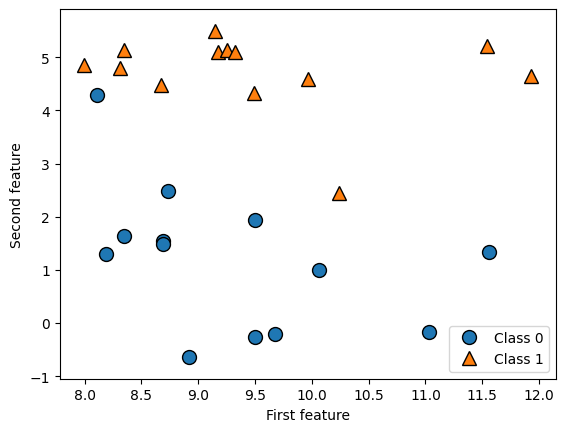

In [4]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()



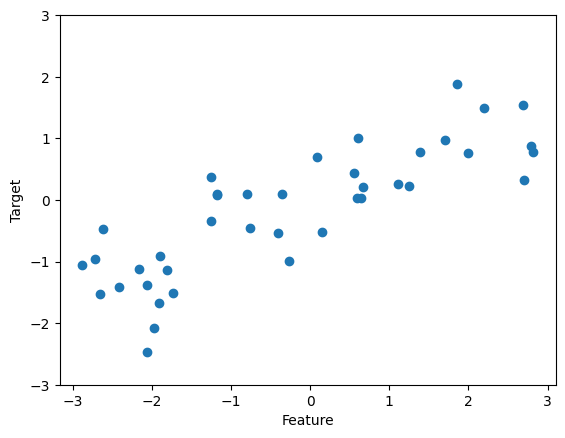

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"cancer.keys: {cancer.keys()}")
print(f"Shape of cancer data: {cancer.data.shape}")
print(f"{[n for n in zip(cancer.target_names, np.bincount(cancer.target))]}")
print(f"Feature names: \n{cancer.feature_names}")

cancer.keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
[('malignant', 212), ('benign', 357)]
Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
# from sklearn.datasets import load_boston
# boston = load_boston()
# print(f"Data shape: {boston.data.shape}")

# K-Nearest Neighbors
1. A supervised machnine learning used for classification and regression
2. A given data point is determined by its surrounding points
3. The key parameter K is to decide the number of nearby points.

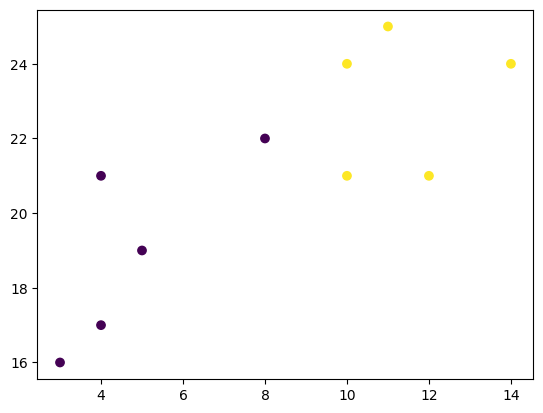

In [20]:
import matplotlib.pyplot as plt
x = [4, 5, 10, 4,3,11,14,8,10,12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
plt.scatter(x, y, c=classes)
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=3)

In [22]:
new_x = 8
new_y = 21
new_data = [(new_x, new_y)]

prediction = knn.predict(new_data)
print(f"Prediction: {prediction}")

Prediction: [0]


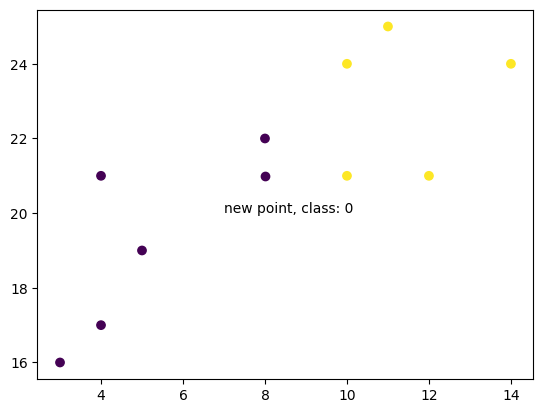

In [23]:
plt.scatter(x, y, c=classes)
plt.scatter(new_x, new_y, c=[0])
plt.text(x=new_x-1, y=new_y-1, s=f"new point, class: 0")
plt.show()

In [16]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
print(f"Prediction: {knn.predict([[2.5]])}")
print(f"proba: {knn.predict_proba([[2.5]])}")
print(f"Accuracy: {knn.score(X, y)}")

Prediction: [1]
proba: [[0.33333333 0.66666667]]
Accuracy: 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm = 'auto', n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [ ]:
x_min, x_max = X_train[:,0].min(), X_train[:,0].max()
y_min, y_max = X_train[:,1].min(), X_train[:,1].max()

In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [ ]:
xx.shape

(307, 197)

In [ ]:
z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

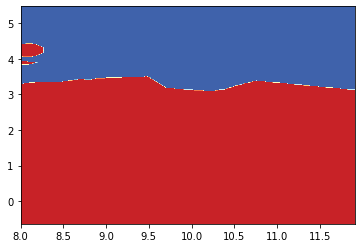

In [ ]:
plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)

In [ ]:
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
step=0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

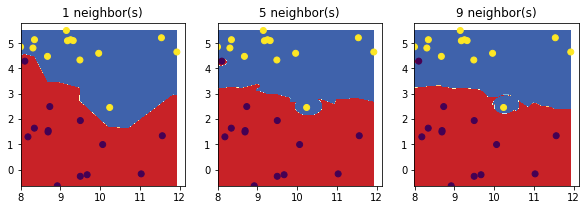

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for neighbor, ax in zip([1,5,9], axes.ravel()):
  knn = KNeighborsClassifier(n_neighbors=neighbor, weights='distance', n_jobs=-1).fit(X, y)
  zz = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  ax.contourf(xx, yy, zz, cmap=plt.cm.RdYlBu)
  ax.scatter(X[:,0], X[:,1], c=y)
  ax.set_title('{} neighbor(s)'.format(neighbor))


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [ ]:
train_accuracy = []
test_accuracy = []
neighbors = range(1,20)

In [ ]:
neighbors

range(1, 20)

In [ ]:
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor, weights='distance', n_jobs=-1).fit(X_train, y_train)
  train_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

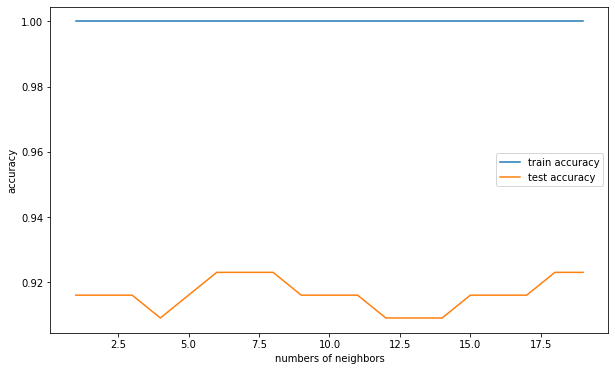

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neighbors, train_accuracy, label='train accuracy')
plt.plot(neighbors, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('numbers of neighbors')
plt.legend()
plt.show()

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
names = ["Nearest Neighbours", "Linear SVM", "RBF SVM",
         "Gaussian Process", "Decision Tree", "Random Forest",
         "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


In [44]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]


In [50]:
figure = plt.figure(figsize=(27, 9))
i = 1
for ds_cnt, ds in enumerate(datasets):
  X, y = ds
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
  y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(len(datasets), len(names), i)
  if ds_cnt == 0:
    ax.set_title("Input data")
  ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright, edgecolors='k')
  ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
  ax.set_xlim(x_min, x_max)
  ax.set_ylim(y_min, y_max)
  ax.set_xticks(())
  ax.set_yticks(())
  i += 1





<Figure size 2700x900 with 0 Axes>

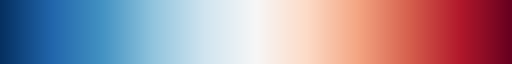

In [62]:
plt.cm.RdBu_r

In [39]:
linearly_separable

(array([[-0.17749658,  0.93049627],
        [ 1.97742406,  1.76615529],
        [ 1.80002379,  1.7003428 ],
        [-0.77083686,  2.35916348],
        [-0.30800901,  1.59406316],
        [ 0.61472141,  2.43489824],
        [ 1.0909431 ,  2.21663402],
        [-0.83488954,  2.35868875],
        [ 2.47946499,  1.33418967],
        [ 1.19926597,  1.82681392],
        [ 2.18506184,  0.8226875 ],
        [ 1.68423203,  1.0411311 ],
        [ 1.14621135,  2.07048527],
        [ 1.35596945,  0.56802498],
        [ 1.38520748,  1.82607238],
        [ 1.86729217,  1.18692699],
        [ 0.31227376,  2.24605353],
        [-0.08183484,  1.70065511],
        [ 0.90484472,  2.60683016],
        [-0.4358609 ,  2.0151414 ],
        [ 0.81441196,  2.13546784],
        [ 3.10874312,  2.26786504],
        [-0.25574217,  1.71281146],
        [ 1.88663027,  2.72089513],
        [ 2.29503547,  3.89267759],
        [-0.11415626,  0.85593357],
        [ 1.69703537,  3.47717799],
        [ 1.83855775,  0.926

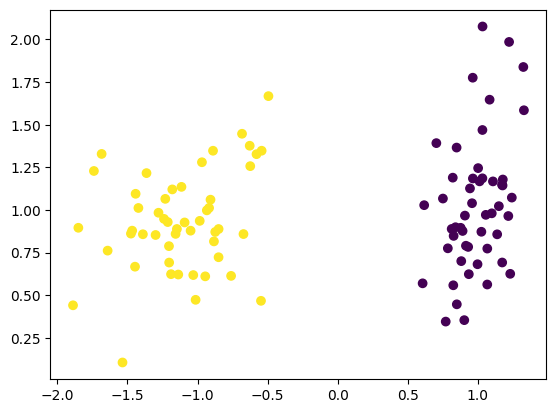

In [32]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## K-neighbors regression
The prediction using a single neighbor is just the target value of the nearest neighbor. If more than one neighbor, the prediction is average, or mean, of the relevant neighbors

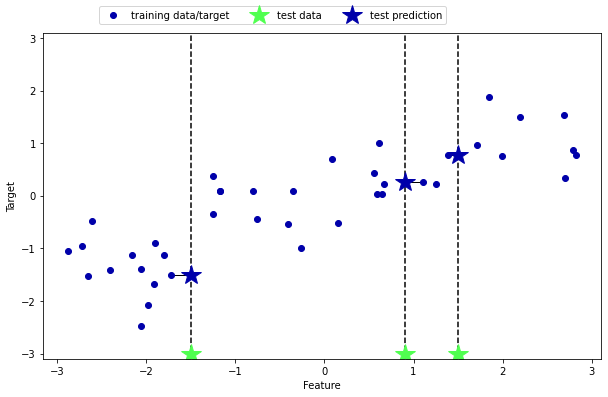

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

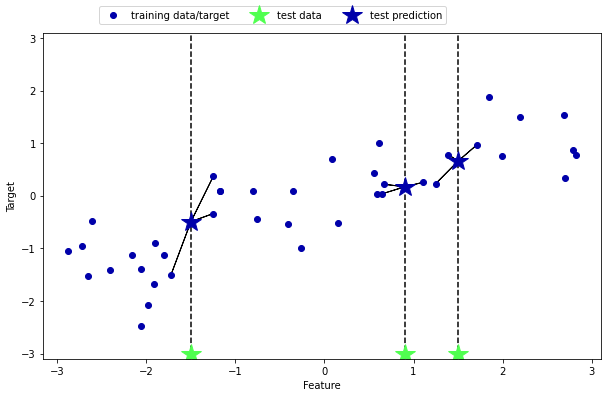

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
reg.score(X_test, y_test)

0.8344172446249605

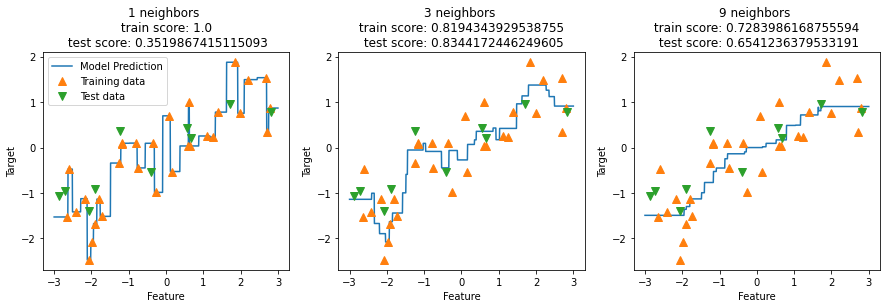

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', markersize=8)
  ax.plot(X_test, y_test, 'v', markersize=8)
  ax.set_title(f"{n_neighbors} neighbors \n train score: {reg.score(X_train, y_train)} \n test score: {reg.score(X_test, y_test)}")
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
axes[0].legend(['Model Prediction', 'Training data', 'Test data'], loc='best')



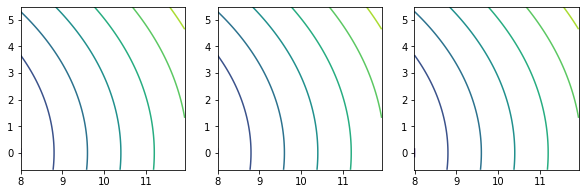

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for neighbor, ax in zip([1,5,9], axes):
  zz = np.sqrt(xx**2 + yy**2)
  ax.contour(xx, yy, zz)


# Linear Regression

## The normal equation
a closed-form solution to find the value of theta minimizing the cost function


In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

In [ ]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.07534505],
       [2.98501571]])

Building model using Scikit-Learn.
This function computes θ = X+ y, where X+ is the pseudoinverse of X (specifically the
Moore-Penrose inverse).





In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(X,y)
reg.intercept_, reg.coef_

(array([4.07534505]), array([[2.98501571]]))

## Gradient Descent
gradient descent (also called steepest descent) is an iterative optimization to find local or global minimum. Some key factors in gradient descent.
1. random initiation
2. learning rate
3. complexity of cost funciton, but MSE cost function is convex function
4. the cost function has bowl shape but can be elongated if the features have different scales.  

### Batch Gradient Descent

In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100 # number of data
theta = np.random.randn(2,1)

In [ ]:
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

### Stochastic Gradient Descent
1. Stochastic gradient descent just pick a random instance in the training set a every step and computes the gradients base on that single instance.
2. When the cost functio is very irregular, this can actually help the algorithm jump out of local minima.



In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.1008704],
       [2.9478422]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([4.09929999]), array([3.05696214]))

### Mini-batch Gradient Descent

### Polynomial Regression

In [ ]:
# generate nonlinear data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

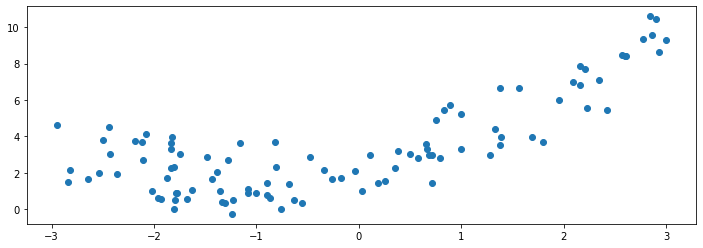

In [ ]:
fig = plt.figure(figsize=(12, 4))
plt.scatter(X, y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.06344369]), array([[1.06573895, 0.51972345]]))

In [ ]:
y_predict = lin_reg.predict(X_poly)

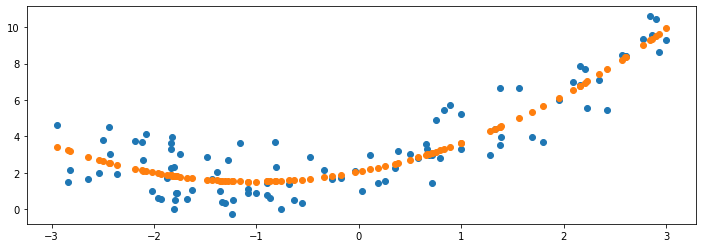

In [ ]:
fig = plt.figure(figsize=(12, 4))
plt.scatter(X, y)
plt.scatter(X, y_predict)

### Learning Curve

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), linewidth=3, label='train')
  plt.plot(np.sqrt(val_errors), linewidth=3, label='validation')
  plt.legend()




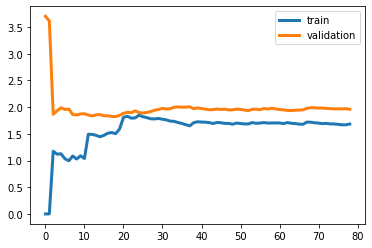

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

(0.0, 5.0)

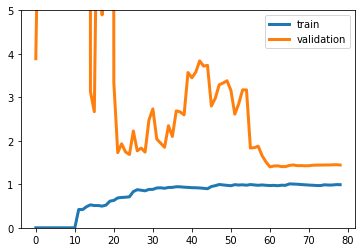

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)), ('lin_reg', LinearRegression())])
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0, 5)

## Logistic Regression

In [ ]:
y

array([[ 1.04293915e+01],
       [ 3.28454476e+00],
       [ 3.01759465e+00],
       [ 1.70628578e+00],
       [ 7.06804035e+00],
       [ 1.00443129e+00],
       [ 4.42036716e+00],
       [ 6.65055517e+00],
       [ 5.72520008e+00],
       [ 3.53562960e+00],
       [ 3.29786399e+00],
       [ 6.05574039e-01],
       [ 2.84080346e+00],
       [ 2.16879783e+00],
       [ 5.21391531e-01],
       [ 3.98875958e+00],
       [ 8.80816390e-01],
       [ 7.86667040e+00],
       [ 4.64782041e+00],
       [ 1.63514949e+00],
       [ 3.82691970e+00],
       [ 6.64001825e+00],
       [ 2.24996610e+00],
       [ 3.03832041e+00],
       [ 2.01440533e+00],
       [ 8.43779027e+00],
       [ 1.48436359e+00],
       [ 1.44219611e+00],
       [ 9.55046180e+00],
       [ 3.68805739e+00],
       [ 3.98498696e+00],
       [ 4.48838438e+00],
       [ 1.74075912e+00],
       [ 1.01208012e+00],
       [ 2.80318280e+00],
       [ 1.45822742e+00],
       [ 5.31892578e-01],
       [ 1.92600023e+00],
       [ 3.5

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [ ]:
iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

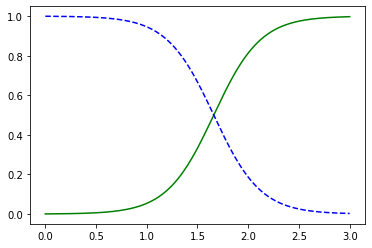

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:,1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_prob[:,0], 'b--', label='Non Iris')
plt.show()

### Softmax Regression
The logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers.

the softmax regression computes a score for each class, then estimates the probability of each class.

The softmax classifier predicts only one class at a time

The cost function is the cross entropy.

In [ ]:
X = iris['data'][:, (2,3)]
y = iris['target']

In [ ]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

# Decision Tree

## Start with an example
Decision Trees require very little data preparation. In particular, They don't require feature scaling and centering at all.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
from matplotlib import image
export_graphviz(tree_clf, out_file='iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Decision Trees are often called white box models while Random Forest or neural networks are generally considered as black box models.

## The CART Training Algorithm
Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees. The model first split the training set in two subsets using a single feature *k* and a threshold *t*. Once it has successfully split the training set in two, it splits the subsets using the same logic

The CART algorithm is a greedy algorithm.

A greedy algorithm often producess a reasonalbly good solution, but it is not guaranteed to be the optimal solution.


## Gini Impurity or Entropy
By default, the Gini impurity measure is used, but entropy impurity can be the alternative. In most cases, the two options do not make differences.

## Regularization Hyperparameters
1. Decision Trees make very few assumption about the training data. if no constrain, the tree will adapt itself to the training data, very likely overfitting.
2. It does have some parameters but the number of the parameters is not determined prior to training.
3. The most regularized hyperparameters is the maximum depth of the Decision Tree.

## Regression
1. Decision Trees are capable of performing regression task.
2. The Decisio Trees predicts a value by averaging target value of the training instances of the leaf node.
3. Instead of impurity, it tries minimize the MSE.
4. Decison Trees like orthogonal decision boundaries, which makes them sensitive to training set rotation. Using PCA often results in a better orientation of the training data.


# Ensemble Learning
1. A group of predictors is called an ensemble. The technique to train a model by an ensemble is called ensemble learning.
2. Ensemble methods work best when the predictors are as independent fro one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increase the chance that they will make very different types of errors, improving the emsembles' accuracy.



## Voting Classifiers
1. A simple way to create an better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This mojority-vote classifier is called a hard voting classifier.
2. The voting classifier is always better than the best classifier in the ensemble. Even if each classifier is a weak learner, the ensemble can still be a strong learner.
3. If all classifier are able to estimate class probabilities, then it can predict the class with the highest class probability averaging over all the individual classifiers. This is called soft voting.
3. The soft voting have better performance than hard voting.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9333333333333333
RandomForestClassifier 0.9333333333333333
SVC 0.9333333333333333
VotingClassifier 0.9333333333333333


## Bagging and Pasting
1. The same training algorithm for every predictor, but train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging (bootstrap aggregating). When sampling is performed without replacement, it is called pasting.
2. Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the statistical mode for the classification, or the average for regression.
3. Each predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

## Out-of-Bag Evaluation
1. With bagging, some instance may be sample several times for any given predictor, while others may not be sampled at all. This means only about 63% of the training instances are sampled on average for each predictor. The remaining 37% of the training instances that are not sampled are call out-of-bag (oob) instances.
2. Since a predictor never sees the oob instaces during training, it can be evaluated on these instances without the need for a separate validation.


In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [ ]:
bag_clf.oob_score_

0.9619047619047619

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

## Random Patches and Random Subspaces
1. The BaggingClassifier class support sampling the features.
2. This is particularly useful when you are dealing with high-dimensional inputs.


## Random Forest
1. The Random Forest algorithm introduces extra randomness when growing trees;
instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which trades a higher bias for a lower variance, generally yieliding an overall better model.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

## Extra-Trees
When a Random Forest growing, at each node only a random subset of the features is considered for splitting. It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds. A forest of such extremely random trees is simply called an Extremely Randomized Trees ensemble.

## Feature Importance
Random Forests can measure the relative importance of each feature. Scikit-Learn measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average. Scikit-Learn computes this score automatically for each feature after training, then it scales the results so that the sum of all importance is equal to 1.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.09591337196119329
sepal width (cm) 0.024151261479837847
petal length (cm) 0.4451728952504937
petal width (cm) 0.43476247130847523


## AdaBoost
1. Boosting refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecesor. The most popular are AdaBoost and Gradient Boosting.
2. This sequential learning technique has some similarities with Gradient Descent, except that instead of tweaking a single predictor's parameters to minimize a cost function, AdaBoost adds predictors to the ensemble, gradually making it better.
3. This sequential learning cannot be parallelized (or only partially), since each predictor can only be trained after the previous predictor has been trained and evaluated.
4. To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights. The predicted class is the one that receives the majority of weighted votes.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

## Gradient Boosting
1. Like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Fit a DecisionTreeRegressor to the training set
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)
# Train a second DecisionTreeRegressor on the residual errors made by the first predictor
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)
# Train a third one on the residual errors made by the second predictor
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)
# Now we have an ensemble containing three trees. It can make predictions on a new instance simply by adding up the prediction of all the trees
# y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))



DecisionTreeRegressor(max_depth=2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

1. The learning_rate hyperparameter scales the contribution of each tree. if you set it to a low value, you will need more trees in the ensemble to fit the training set, but the prediction s will usually generalize better. This is a regularization technique called *shrinkage*.
2. In order to find the optimal number of trees, you can use early stopping.
3. The following code trains a GBRT ensemble with 120 trees, then measures the validation error at each stage of training to find the optimal number of trees, and finally trains another GBRT ensemble using the optimal number of trees.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)



GradientBoostingRegressor(max_depth=2, n_estimators=85)

It is also possible to implement early stopping by actually stopping training early. The following code stops training when the validation error does not improve for five iterations in a row:

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1, 200):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train, y_train)
  y_pred = gbrt.predict(X_val)
  val_error = mean_squared_error(y_val, y_pred)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break

## Stochastic Gradient Boosting
1. The GradientBoostingRegressor class also supports a subsample hyperparameter, which specifies the fraction of training instances to be used for training each tree. For example, if subsample=0.25, then each tree is trained on 25% of the training instances, selected randomly. This trades a higher bias for a lower variance. It also speeds up training considerably. This technique is called *Stochastic Gradient Boosting*
2. It is worth noting that an optimized implementation of Gradient Boosting is available in the popular python library XGBoost, which stands for Extreme Gradient Boosting. It aims at being extremely fast, scalable and portable. In fact, XGBoost is often an important component of the winning entries in ML competitions. XGBoost API is quite similar to Scikit-Learn

In [ ]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred= xgb_reg.predict(X_val)



[03:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.927788
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.844201
[2]	validation_0-rmse:0.770277
[3]	validation_0-rmse:0.70256
[4]	validation_0-rmse:0.64264
[5]	validation_0-rmse:0.587379
[6]	validation_0-rmse:0.540358
[7]	validation_0-rmse:0.496507
[8]	validation_0-rmse:0.457205
[9]	validation_0-rmse:0.422026
[10]	validation_0-rmse:0.390584
[11]	validation_0-rmse:0.36253
[12]	validation_0-rmse:0.337541
[13]	validation_0-rmse:0.313838
[14]	validation_0-rmse:0.29417
[15]	validation_0-rmse:0.276765
[16]	validation_0-rmse:0.261394
[17]	validation_0-rmse:0.24667
[18]	validation_0-rmse:0.233621
[19]	validation_0-rmse:0.220533
[20]	validation_0-rmse:0.208746
[21]	validation_0-rmse:0.

## Stacking
Another ensemble is stacking (stacked generalization).